In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
%config InlineBackend.figure_format = 'retina'

In [2]:
X_and_Y = np.load('./ionosphere.npy')
print(X_and_Y.shape)
np.random.shuffle(X_and_Y)
X = X_and_Y[:,:-1]   
Y = X_and_Y[:,-1]
print(X.shape, Y.shape)

(351, 35)
(351, 34) (351,)


In [3]:
X_train_val = X[:int(round(0.8*len(X_and_Y))),:] # Get features from train + val set.
X_test      = X[int(round(0.2*len(X_and_Y))):,:] # Get features from test set.     
Y_train_val = Y[:int(round(0.8*len(X_and_Y)))] # Get labels from train + val set.
Y_test      = Y[int(round(0.2*len(X_and_Y))):] # Get labels from test set.  
print(X_train_val.shape, X_test.shape, Y_train_val.shape, Y_test.shape)

(281, 34) (281, 34) (281,) (281,)


In [4]:
max_depth = [1,2,3,4,5]
dtc = DecisionTreeClassifier(criterion='entropy')
clf = GridSearchCV(dtc,{'max_depth':max_depth},cv=5)
clf.fit(X_train_val, Y_train_val)
print(clf.cv_results_['mean_test_score'])
print(clf.cv_results_['mean_train_score'])

[ 0.83274021  0.90035587  0.90391459  0.88256228  0.87900356]
[ 0.83986771  0.91103097  0.91814223  0.95106304  0.97598778]


/home/jytay/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


/home/jytay/anaconda3/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


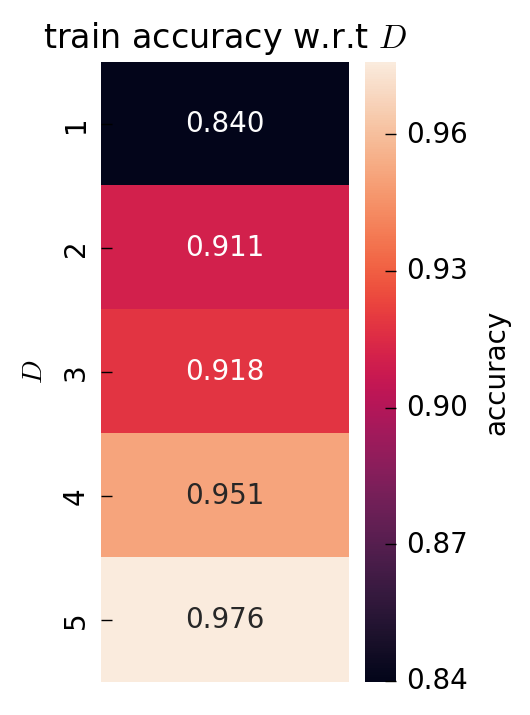

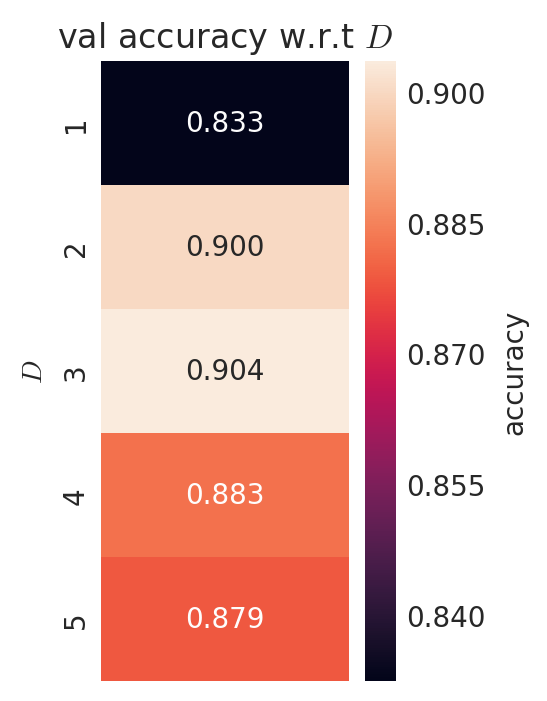

3


In [5]:
def draw_heatmap(acc, acc_desc, max_depth):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=max_depth, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$D$')
    plt.title(acc_desc + ' w.r.t $D$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
  
train_acc = clf.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap(train_acc, 'train accuracy', max_depth)

val_acc = clf.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap(val_acc, 'val accuracy', max_depth)

print(clf.best_estimator_.max_depth)

In [6]:
predicts = clf.predict(X_test)
correct = 0.0
for i in range(predicts.size):
    if(predicts[i] == Y_test[i]):
        correct = correct + 1

test_acc = correct/predicts.size
print(test_acc)

0.900355871886121
